In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# Pad naar de dataset
data_dir = "idc_regular"

# Functie om de dataset in te laden
def load_data(data_dir):
    data = []
    for patient_dir in os.listdir(data_dir):
        patient_path = os.path.join(data_dir, patient_dir)
        if os.path.isdir(patient_path):
            for label in ['0', '1']:
                label_dir = os.path.join(patient_path, label)
                for file in os.listdir(label_dir):
                    if file.endswith('.png'):
                        file_path = os.path.join(label_dir, file)
                        data.append({
                            'patient': patient_dir,
                            'label': int(label),
                            'file_path': file_path
                        })
    return pd.DataFrame(data)

# Data inladen
df = load_data(data_dir)
print(f"Data geladen: {len(df)} rijen")
print(df.head())

# Controleer op missende waarden
missing_values = df.isnull().sum()
print("Missende waarden per kolom:")
print(missing_values)


Data geladen: 277524 rijen
  patient  label                                          file_path
0   10253      0  idc_regular\10253\0\10253_idx5_x1001_y1001_cla...
1   10253      0  idc_regular\10253\0\10253_idx5_x1001_y1051_cla...
2   10253      0  idc_regular\10253\0\10253_idx5_x1001_y1101_cla...
3   10253      0  idc_regular\10253\0\10253_idx5_x1001_y1151_cla...
4   10253      0  idc_regular\10253\0\10253_idx5_x1001_y1201_cla...
Missende waarden per kolom:
patient      0
label        0
file_path    0
dtype: int64


Uitsneden per klasse:
label
0    198738
1     78786
Name: count, dtype: int64
Verhouding tussen klassen:
label
0    71.611104
1    28.388896
Name: count, dtype: float64
         Gezond (%)  Ongezond (%)
patient                          
10253     87.249545     12.750455
10254     91.037736      8.962264
10255     66.544118     33.455882
10256     75.000000     25.000000
10257     67.244094     32.755906


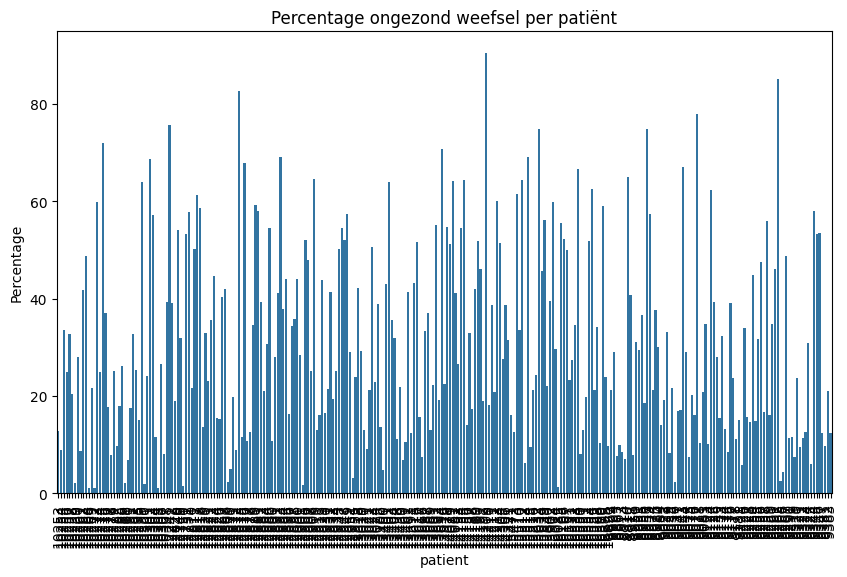

In [7]:
# Aantal uitsneden per klasse
counts = df['label'].value_counts()
print(f"Uitsneden per klasse:\n{counts}")

# Verhouding tussen gezond en ongezond weefsel
total = len(df)
percentages = counts / total * 100
print(f"Verhouding tussen klassen:\n{percentages}")

# Percentage ongezond weefsel per patiënt
patient_stats = df.groupby('patient')['label'].value_counts(normalize=True).unstack().fillna(0)
patient_stats.columns = ['Gezond (%)', 'Ongezond (%)']
patient_stats *= 100
print(patient_stats.head())

# Visualisatie van ongezond weefsel per patiënt
plt.figure(figsize=(10, 6))
sns.barplot(x=patient_stats.index, y=patient_stats['Ongezond (%)'])
plt.xticks(rotation=90)
plt.title("Percentage ongezond weefsel per patiënt")
plt.ylabel("Percentage")
plt.show()


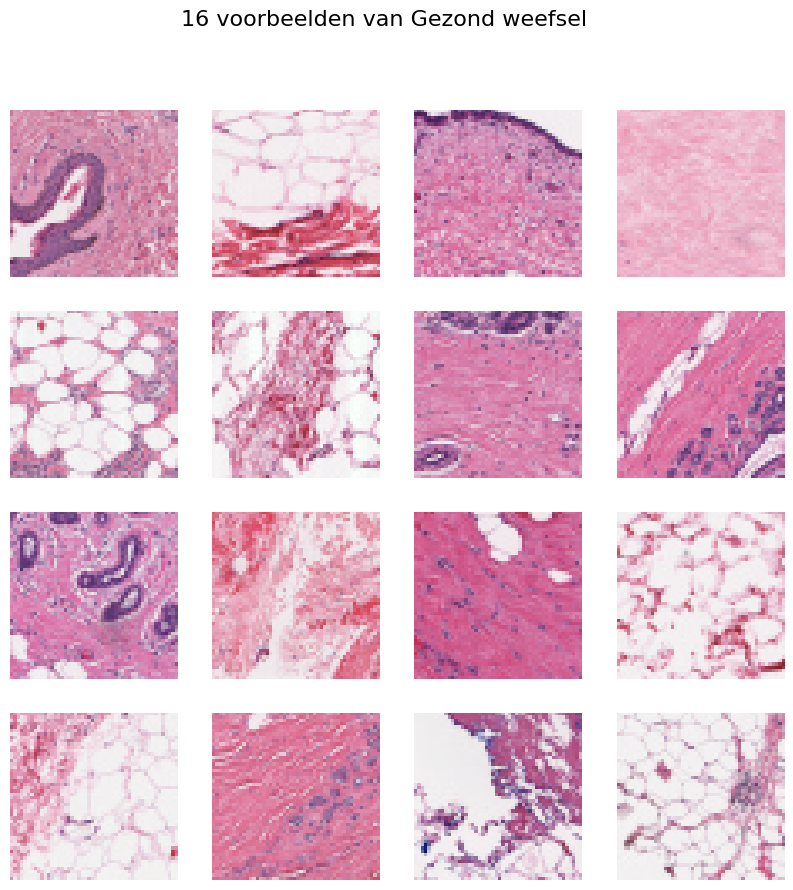

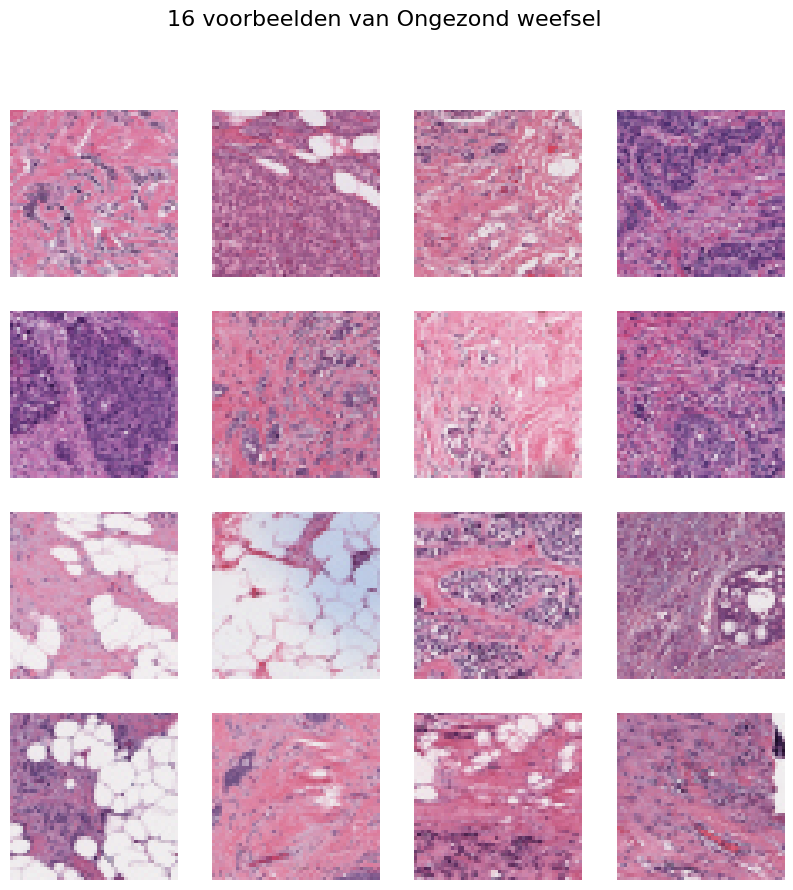

In [11]:
# Functie om afbeeldingen te tonen
def plot_samples(df, label, n=16):
    samples = df[df['label'] == label].sample(n)
    plt.figure(figsize=(10, 10))
    for i, file_path in enumerate(samples['file_path']):
        plt.subplot(4, 4, i + 1)
        img = Image.open(file_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(f"{n} voorbeelden van {'Ongezond' if label == 1 else 'Gezond'} weefsel", fontsize=16)
    plt.show()

# Toon voorbeelden
plot_samples(df, label=0, n=16)  # Gezond
plot_samples(df, label=1, n=16)  # Ongezond

